# DMW Mini Project

## Setting up the project

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Function to print metrics
def Metrics(model):
    print(f'Confusion Matrix: \n{confusion_matrix(predictions, y_test)}')
    print(f'Accuracy = {accuracy_score(y_test, predictions)*100} %')

## Data Preprocessing

In [2]:
# Read the data in DataFrame
df = pd.read_csv('cancer_data.csv')
df.info()
# Dropping the 'unnamed' column
df.drop(columns = ['Unnamed: 32'], inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# We need to visualize only mean columns
features_mean= df.columns[1:11]

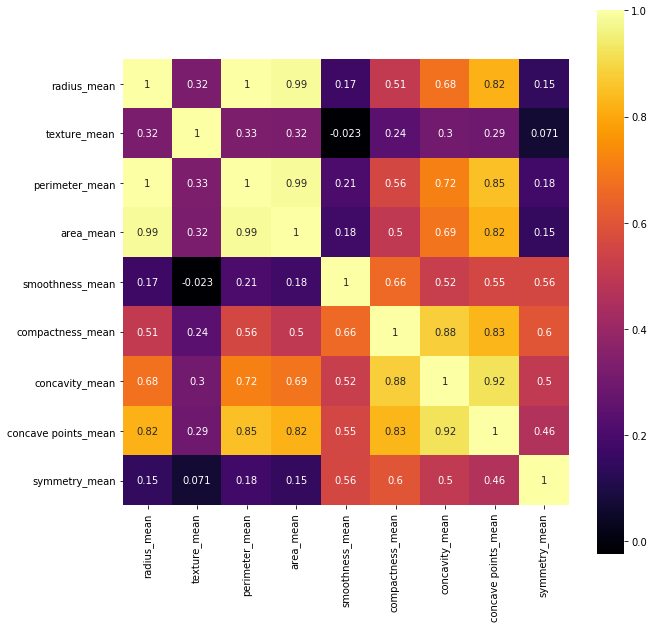

In [4]:
#Heatmap to check correlation
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap = 'inferno');

<Figure size 1440x1440 with 0 Axes>

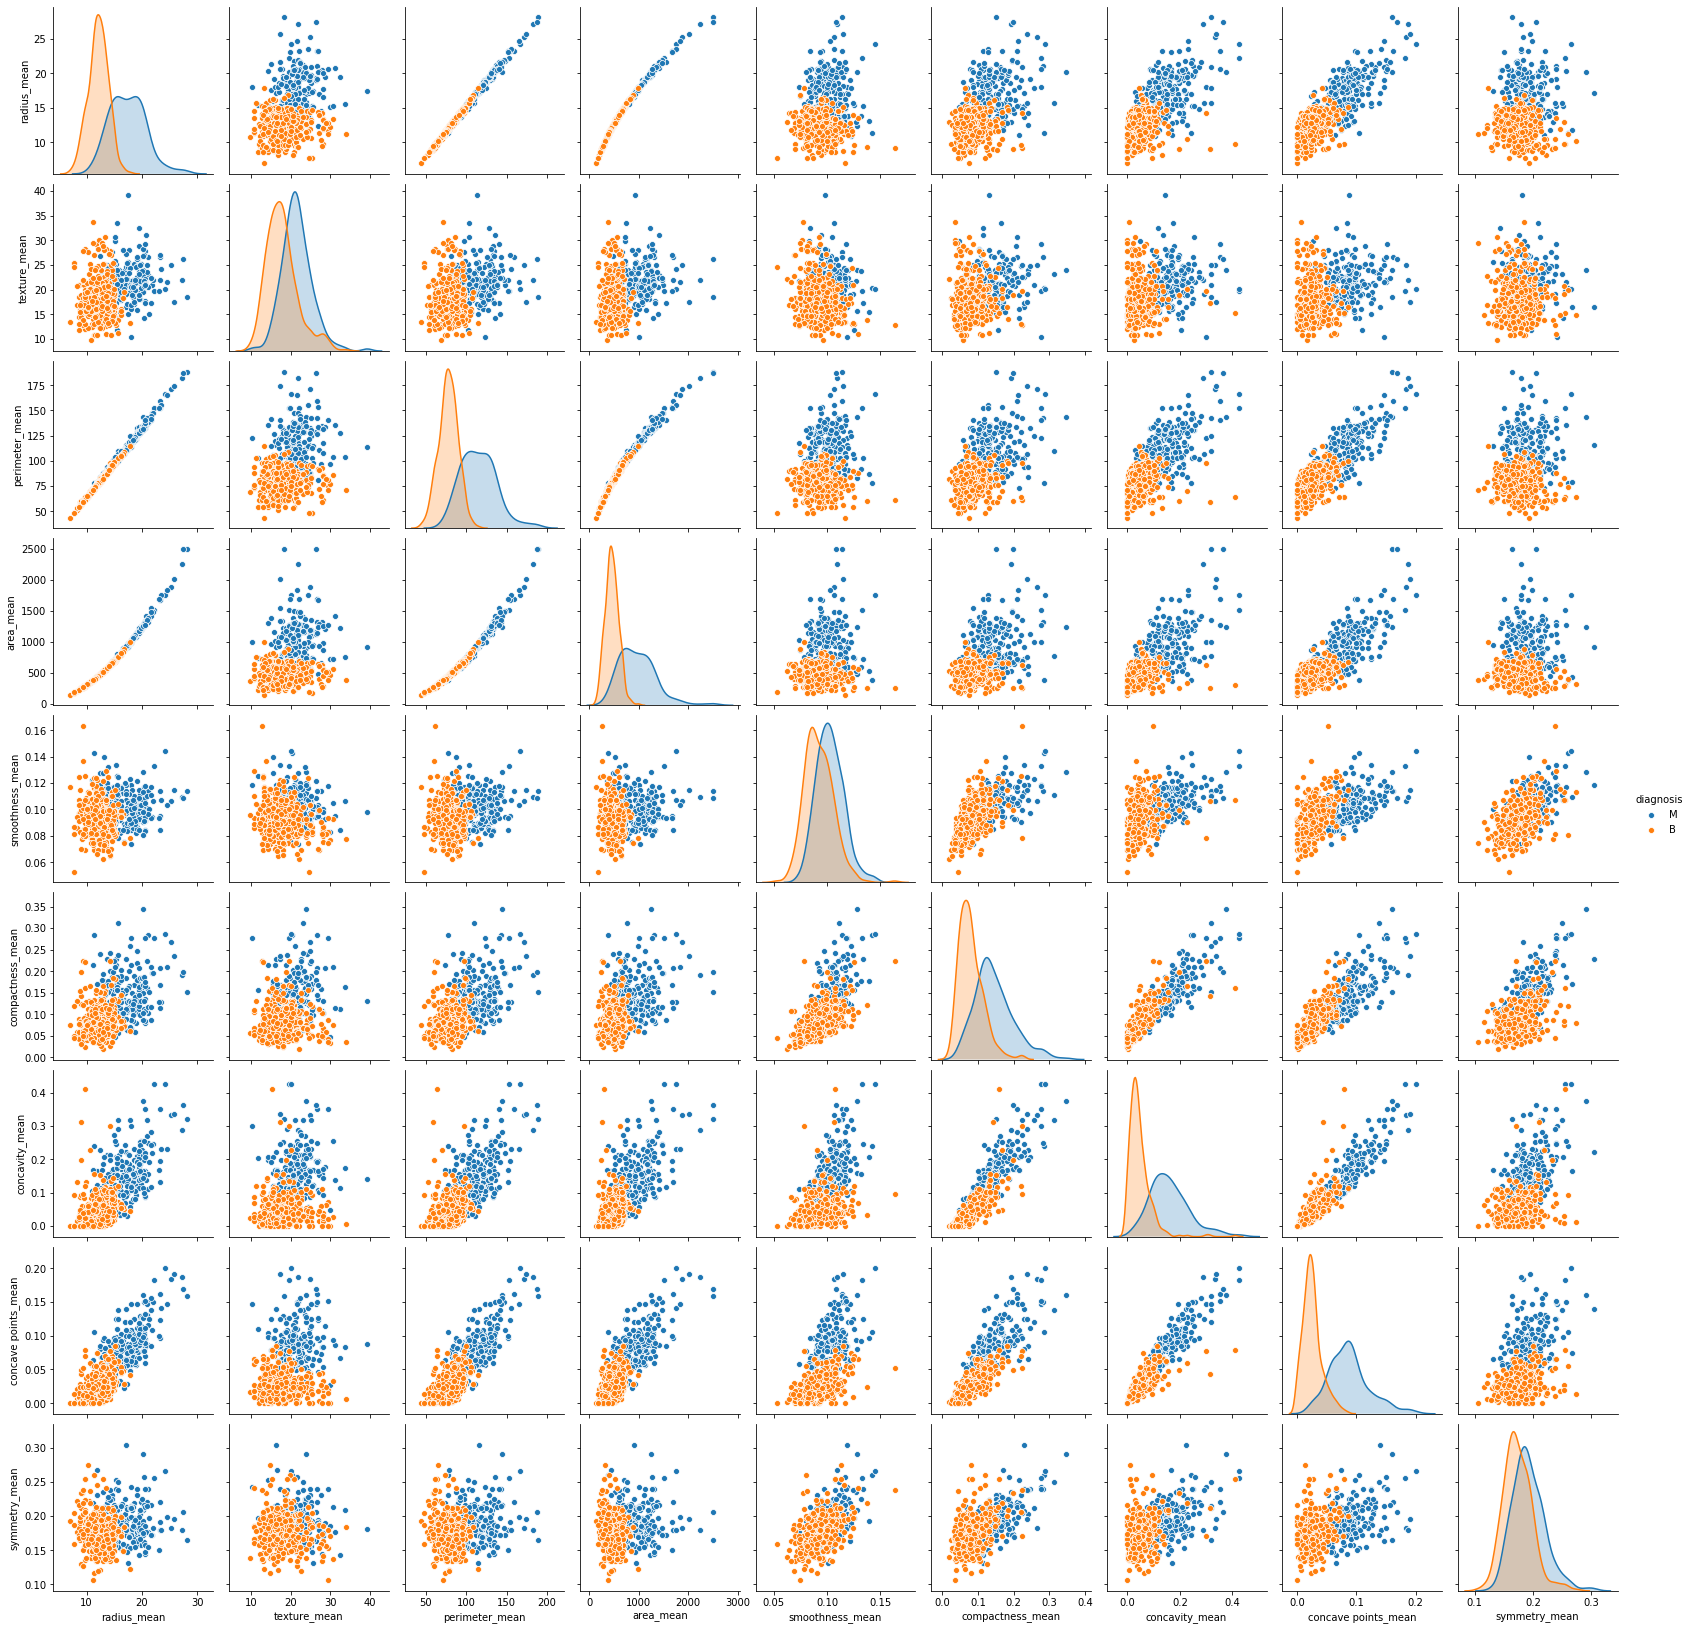

In [5]:
#Pairplot for a better visualization of dataset
plt.figure(figsize=(20,20))
sns.pairplot(data = df[features_mean], hue = 'diagnosis');

In [6]:
#Converting to dummy variables aka One Hot Encoding
diagnosis_oh = pd.get_dummies(df['diagnosis'])
df.drop(['id', 'diagnosis'],axis=1,inplace=True)

#Concatenate new sex and embark column to our train dataframe
df = pd.concat([df,diagnosis_oh],axis=1)
df = df.rename(columns = {'M':'Result'})

#Remedy for Dummy Variables Trap
df.drop(columns = ['B'], inplace = True)

#Glancing the prepped dataset
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


## Model Training

In [7]:
#Defining X and y vectors
X = df.drop('Result',axis=1)
y = df['Result']

### Test train split

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Models

#### 1. Logistic Regression

In [21]:
#Instantiate the Logistic Regression model
logmodel = LogisticRegression(solver='liblinear')
#Fit the model on X_train, y_train
logmodel.fit(X_train, y_train);

In [22]:
#Predictions
predictions = logmodel.predict(X_test)

In [23]:
#Confusion Matrix & Accuracy
Metrics(logmodel)

Confusion Matrix: 
[[85  1]
 [ 5 52]]
Accuracy = 95.8041958041958 %


#### 2. Naive Bayes

In [24]:
#Instantiate the Naive Bayes model
nbmodel = GaussianNB()
#Fit the model on X_train, y_train
nbmodel.fit(X_train, y_train);

In [25]:
#Predictions
predictions = nbmodel.predict(X_test)

In [26]:
#Confusion Matrix & Accuracy
Metrics(nbmodel)

Confusion Matrix: 
[[86  5]
 [ 4 48]]
Accuracy = 93.7062937062937 %


#### 3. K-Nearest Neighbours

In [27]:
#Instantiate the Naive Bayes model
knnmodel = KNeighborsClassifier()
#Fit the model on X_train, y_train
knnmodel.fit(X_train, y_train);

In [28]:
#Predictions
predictions = knnmodel.predict(X_test)

In [29]:
#Confusion Matrix & Accuracy
Metrics(knnmodel)

Confusion Matrix: 
[[85  4]
 [ 5 49]]
Accuracy = 93.7062937062937 %


#### 4. Random Forest Classifier

In [30]:
# Instantiate the Random Forest Model
rfmodel = RandomForestClassifier(random_state = 0)
# Train the model on training data
rfmodel.fit(X_train, y_train);

In [31]:
#Predictions
predictions = rfmodel.predict(X_test)

In [32]:
#Confusion Matrix & Accuracy
Metrics(rfmodel)

Confusion Matrix: 
[[87  1]
 [ 3 52]]
Accuracy = 97.2027972027972 %


#### 5. SVM Classifier

In [33]:
from sklearn.svm import SVC
svc = SVC()

In [34]:
#Predictions
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

#Confusion Matrix & Accuracy
Metrics(svc)

Confusion Matrix: 
[[89  8]
 [ 1 45]]
Accuracy = 93.7062937062937 %
